# Clustering Algorithms in Python

### In this Notebook I have tried to cover some of important points on Different Clustering Algorithms using Credit Card dataset for Segmenting Customer.  

### Table of Contents

* [Introduction](#introduction)  
* [Points need to be Expolred while Clustering](#explore)
* [Scale or Not ?](#scale)
* [Measure of Dissimilarity(Distance)](#dissimilarity)
    * [Numeric variables](#numeric_distance)
    * [Categorical variables](#hamming_distance)
    * [Ordinal variables](#ordinal)
    * [Distance in multiple dimensions](#gower_distance)
* [Segmentation of Credit Card user in Python](#segmentation)
    * [Data Description](#description)
    * [Import Required Library](#import)
* [Understand the Data - Exploratory Data Analysis (EDA)](#eda)
    * [Reading the dataset](#reading)
    * [Dimension of the dataset](#dimension)
    * [Display top rows of the dataset](#head)
    * [Display bottom rows of the dataset](#tail)
    * [Summary Stats](#summary)
    * [How to check for Outliers ?](#outliers)
    * [Sum of Missing values](#missing_values)
* [Data Pre-processing](#preprocessing)
    * [Decouple label from the features](#decouple)
    * [Imputation](#imputation)
    * [Standardization Vs Normalization](#stdvsnorm)
* [Clustering Algorithms](#clust_algo)
    * [K-Means](#kmeans)
        * [Limitations of K-means](#kmeans_limitations)
        * [K-means++](#kmeans++)
        * [K-medoids](#kmedoids)
        * [Silhouette](#silhouette)
        * [Elbow Method](#elbow)
        * [Visualization of Clusters using PCA](#kmeans_visual)
    * [MiniBatch K-Means](#minikmeans)
        * [Visualization of Clusters using PCA](#minikmeans_visual)
    * [Hierarchical Clustering](#hierarchical_clust)
        * [Dendrogram](#dendrogram)
        * [Visualization of Clusters using PCA](#hierarchical_clust_visual)
    * [DBSCAN](#dbscan)
        * [Visualization of Clusters using PCA](#dbscan_visual)
    * [Gaussian Mixture Model](#gmm)
        * [Visualization of Clusters using PCA](#gmm_visual)
    * [MeanShift](#mean_shift)
        * [Visualization of Clusters using PCA](#mean_shift_visual)
* [Interpretation of Clusters](#interpretation)
* [Summary](#summary)

In [32]:
from IPython.display import Image

## Introduction <a class = "anchor" id = "introduction" > </a>

> - Unlike Supervised Learning, Unsupervised Learning has only independent variables and no corresponding target variable. Shortly, the data is unlabeled. The aim of unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

## Points need to be Expolred while Clustering <a class = "anchor" id = "explore" > </a>

> - A measure of (dis)similarity.
- Which dimensions (attributes) are relevant?
- Normalization?
- How many clusters?

## Scale or Not ? <a class = "anchor" id = "scale" > </a>

- **Scale If variables measure different units (kg, meter, sec,…) OR If you explicitly want to have equal weight for each variable**

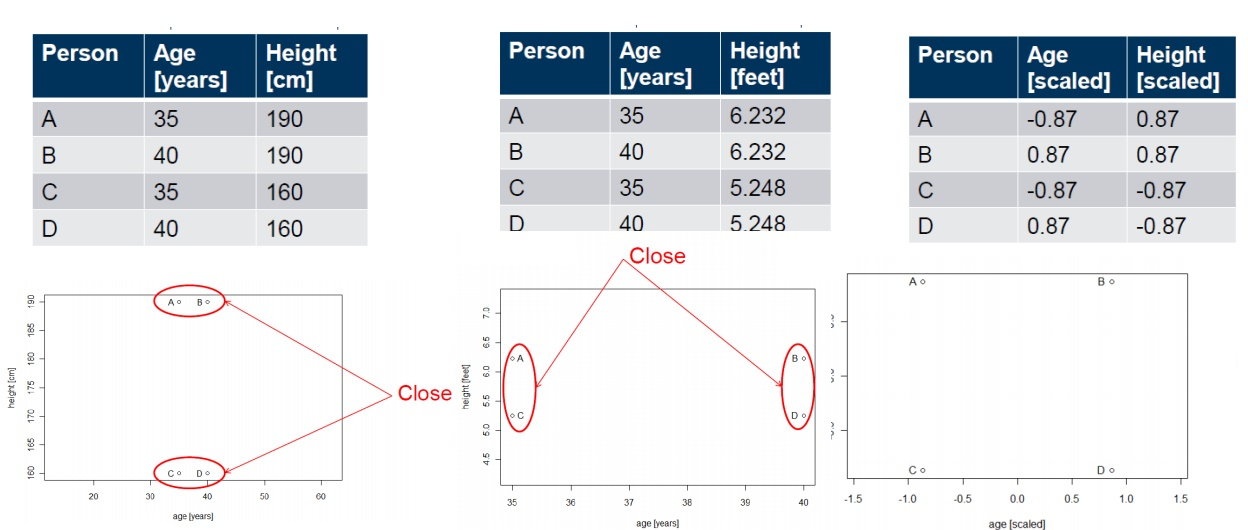

In [33]:
Image(filename=r'scaling.jpg')

> - Table-1 `A and B`, `C and D` looks more similar. [Age in years, Height in cm]
- Table-2 `A and C`, `B and D` looks more similar. [Age in years, Height in feet]
- Table-3 no such similarity in any of the four Person. [Age and Height both are scaled]


## Measure of Dissimilarity(Distance) : <a class = "anchor" id = "dissimilarity" > </a>

### Numeric variables : <a class = "anchor" id = "numeric_distance" > </a>

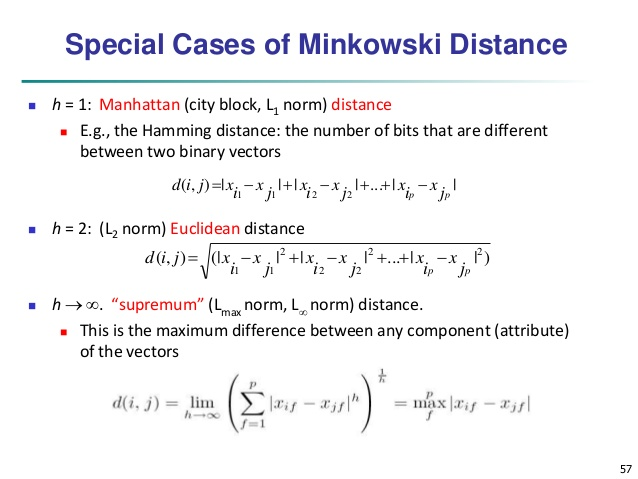

In [34]:
Image(filename=r'distance.jpg') 

### Categorical variables : <a class = "anchor" id = "hamming_distance" > </a>

> One Hot Encoding:
   - A one hot encoding is a representation of categorical variables as binary vectors.

> Hamming distance :
   - Hamming distance is the number of bit positions in which the two bits are different.

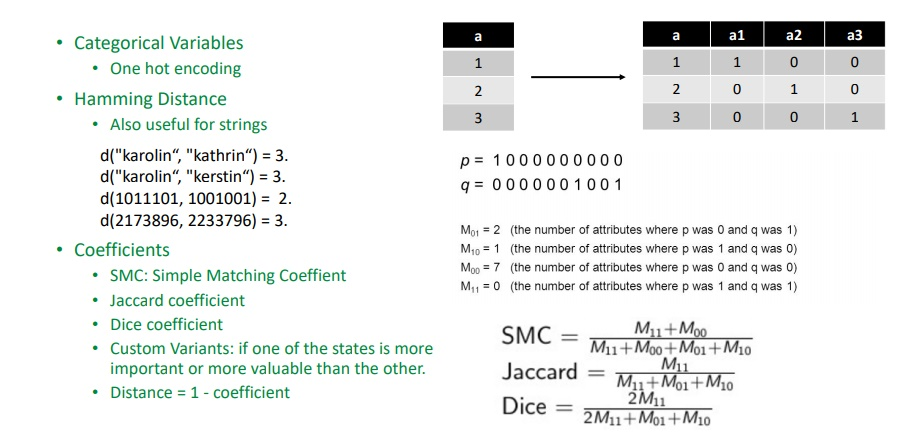

In [35]:
Image(filename=r'hamming_distance.jpg')

### Ordinal variables : <a class = "anchor" id = "ordinal" > </a>

> - $Z_{if}$  = distance between ordinal rows for  feature f.
- $r_{if}$ = difference in row's(i) for  feature f (treat as numeric).
- $M_f$ = maximum rank.

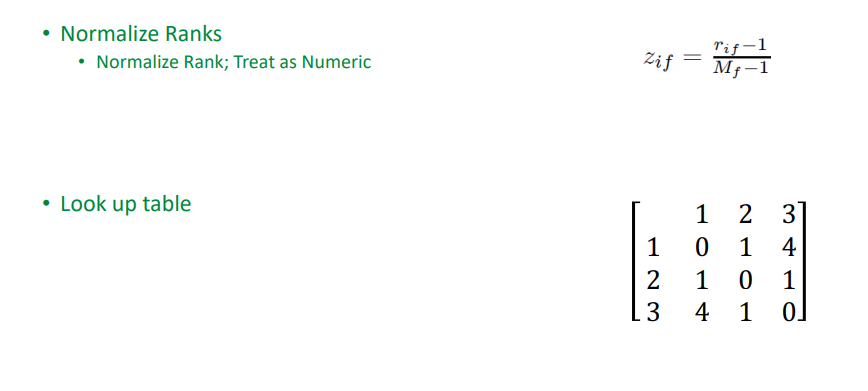

In [36]:
Image('ordinal_distance.png')

## Distance in multiple dimensions : <a class = "anchor" id = "gower_distance" > </a>

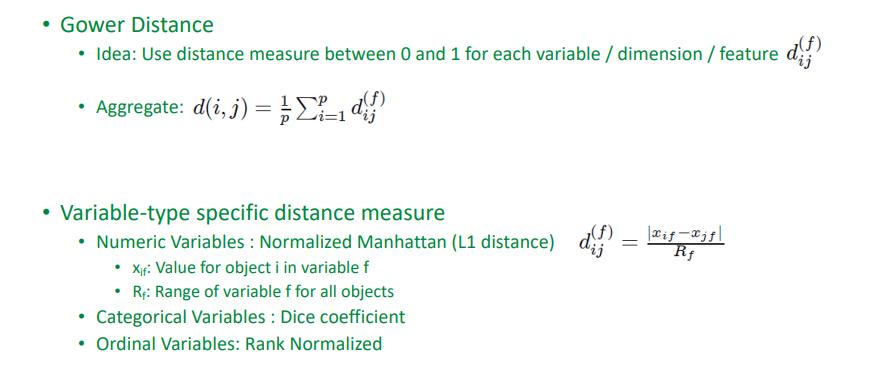

In [37]:
Image('gower_distance.png')

**Important discussion over K-Means :**

It is said that K-means clustering "does not work well with non-globular clusters."
    
> - K-means does not perform well when the groups are grossly non-spherical because k-means will tend to pick spherical
    groups. Tends is the key word and if the non-spherical results look fine to you and make sense then it looks like the
    clustering algorithm did a good job. What matters most with any method you chose is that it works.
- If the clusters are clear, well separated, k-means will often discover them even if they are not globular. But if the
    non-globular clusters are tight to each other - than no, k-means is likely to produce globular false clusters.
    
    
    
What is the best way for cluster analysis when you have mixed type of data? (categorical and scale) ?
    
> - It is simply not possible to use the k-means clustering over categorical data because you need a distance between elements and that is not clear with categorical data as it is with the numerical part of your data. So the best solution that comes to my mind is that you construct somehow a similarity matrix (or dissimilarity/distance matrix) between your categories to complement it with the distances for your numerical data (for which you can use simply an euclidean or manhattan distance). Then use the K-medoid algorithm, which can accept a dissimilarity matrix as input. You can use R with the "cluster" package that includes the pam() function.
- Categorical variables are worse. K-means can't handle them at all; a popular hack is to turn them into multiple binary variables (male, female). This will however expose above problems just at an even worse scale, because now it's multiple highly correlated binary variables.

Outliers : 

> - Clustering helps you find Multidimensional outliers whereas Z-score / Boxplot helps you find Unidimentional outliers. 
- Even if each of these individual values that it has in the cells is not an outlier These values taken together may create an outlier that is what clustering helps you find.

Should you do outlier treatment before clustering ?

>- IT DEPENDS on the context, Sometimes it is worth while doing unidimensional outlier before starting clustering sometimes you may say i want to leave it in their because i will use clustering itself to find the multidimensional outliers which will cover the unidimensional outlier.

## Segmentation of Credit Card user in Python <a class = 'anchor' id = 'segmentation'></a>

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

### Dataset Description <a class = 'anchor' id = 'description'></a>

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)  
BALANCE : Balance amount left in their account to make purchases  
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)  
PURCHASES : Amount of purchases made from account  
ONEOFFPURCHASES : Maximum purchase amount done in one-go  
INSTALLMENTSPURCHASES : Amount of purchase done in installment  
CASHADVANCE : Cash in advance given by the user  
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)  
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)  
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)  
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid  
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"  
PURCHASESTRX : Number of purchase transactions made  
CREDITLIMIT : Limit of Credit Card for user  
PAYMENTS : Amount of Payment done by user  
MINIMUM_PAYMENTS : Minimum amount of payments made by user  
PRCFULLPAYMENT : Percent of full payment paid by user  
TENURE : Tenure of credit card service for user  

### Import Required Library <a class = 'anchor' id = 'import'></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Projection '3d'
import seaborn as sns
from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn import metrics

from sklearn.decomposition import PCA

## Understand the Data - Exploratory Data Analysis (EDA) :<a class = 'anchor' id = 'eda'></a>

In [39]:
import pandas as pd
import numpy as np

### Reading the dataset <a class = 'anchor' id = 'reading'></a>

In [40]:
data = pd.read_csv('CC GENERAL.csv')

### Dimension of the dataset <a class = 'anchor' id = 'dimension'></a>

In [41]:
data.shape

(8950, 18)

### Display top rows of the dataset <a class = 'anchor' id = 'head'></a>

In [42]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

### Display bottom rows of the dataset <a class = 'anchor' id = 'tail'></a>

In [43]:
data.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

### Summary Stats <a class = 'anchor' id = 'summary'></a>

In [44]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

**Observation:** Difference in `75% quartile` value and `max value` for most of the columns are very high. Hence shows presence of Outliers

### How to check for Outliers ? <a class = 'anchor' id = 'outliers'></a>

A commonly used rule says that a data point is an outlier if it is $(1.5*IQR)$ above the third quartile or below the first quartile. Said differently, low outliers are below $Q1−(1.5*IQR)$ and high outliers are above $Q3+(1.5*IQR)$.
    
**For more details on Outliers identification [Click Here](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule)**

<div class="alert alert-block alert-success">
<b>There are lots of outliers in columns but we will not remove them. Because we may have information loss.
They may represent another cluster.</b>
</div>    

In [45]:
# For Observation only (Unidimensional Outliers)

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data[data.columns ]< (Q1 - 1.5 * IQR)) | (data[data.columns] > (Q3 + 1.5 * IQR))).sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
CASH_ADVANCE                        1030
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
CREDIT_LIMIT                         248
CUST_ID                                0
INSTALLMENTS_PURCHASES               867
MINIMUM_PAYMENTS                     841
ONEOFF_PURCHASES                    1013
ONEOFF_PURCHASES_FREQUENCY           782
PAYMENTS                             808
PRC_FULL_PAYMENT                    1474
PURCHASES                            808
PURCHASES_FREQUENCY                    0
PURCHASES_INSTALLMENTS_FREQUENCY       0
PURCHASES_TRX                        766
TENURE                              1366
dtype: int64

### Sum of Missing values <a class = 'anchor' id = 'missing_values'></a>

In [46]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

   **Total null values present in data is 314**

## Data Pre-processing <a class = 'anchor' id = 'preprocessing'></a>

### Decouple label from the features <a class = 'anchor' id = 'decouple'></a>

Dropping `CUST_ID` column from the dataset, As it does not add any value to model building.

In [47]:
data_label = data['CUST_ID']

data.drop('CUST_ID', axis = 1 , inplace=True)

### Imputation <a class = 'anchor' id = 'imputation'></a>

Imputing null values in data with `mean`

In [48]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

### Standardization Vs Normalization <a class = 'anchor' id = 'stdvsnorm'></a>

**For more details on " When Should You Use Normalization And Standardization ? " [Click Here](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=Normalization%20is%20useful%20when%20your,Gaussian%20(bell%20curve)%20distribution.)**

Here, we are `Normalizing` the dataset so that dataset values ranges in between `-1 and 1`

In [49]:
from sklearn.preprocessing import StandardScaler,normalize

standardizer = StandardScaler()

standardizer.fit(data)

std_X = standardizer.transform(data)

std_data = pd.DataFrame(std_X, columns=data.columns)

std_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960433   
1                0.573963          0.110074      -0.591796      0.688639   
2               -0.675349         -0.476070      -0.109020      0.826062   
3               -0.258913         -0.329534      -0.551565      0.826062   
4               -0.675349         -0.476070      -0.551565     -0.905464   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979         -0.310968         -0.525551  0.36068  
1  0.818642          0.089310          0.234227  0.36068  
2 -0.383805         -0.101663         -0.525551  0.36068  
3 -0.598688          0.000000         -0.525551  0.36068  
4 -0.364368         -0.265791         -0.525551  0.36068

In [50]:
norm=normalize(std_data)

df_norm=pd.DataFrame(norm)

df_norm.head()

0         1         2         3         4         5         6  \
0 -0.311938 -0.106297 -0.181072 -0.152108 -0.148760 -0.198921 -0.343687   
1  0.219925  0.037539 -0.131222 -0.099749 -0.127037  0.728166 -0.341434   
2  0.126682  0.146783 -0.030504  0.030850 -0.128790 -0.132249  0.359771   
3  0.020589 -0.426439  0.097309  0.229034 -0.190618 -0.154587 -0.425253   
4 -0.151595  0.218909 -0.195238 -0.146744 -0.192075 -0.197234 -0.428504   

          7         8         9        10        11        12        13  \
0 -0.289212 -0.301422 -0.287801 -0.202878 -0.217905 -0.409290 -0.225425   
1 -0.189660 -0.256265  0.160401  0.030761 -0.165384  0.192448  0.228779   
2  0.757440 -0.259802 -0.191339 -0.134880 -0.030888  0.234039 -0.108739   
3 -0.167447 -0.384524 -0.108570 -0.138184 -0.231288  0.346393 -0.251048   
4 -0.168727 -0.387463 -0.285359 -0.201157 -0.233056 -0.382591 -0.153959   

         14        15        16  
0 -0.132519 -0.223964  0.153704  
1  0.024959  0.065457  0.100796  
2 -0.028803 -0.148899  0.102187  
3  0.000000 -0.220379  0.151244  
4 -0.112306 -0.222064  0.152400

## Clustering Algorithms <a class = 'anchor' id = 'clust_algo'></a>

### K-Means <a class = 'anchor' id ='kmeans'></a>

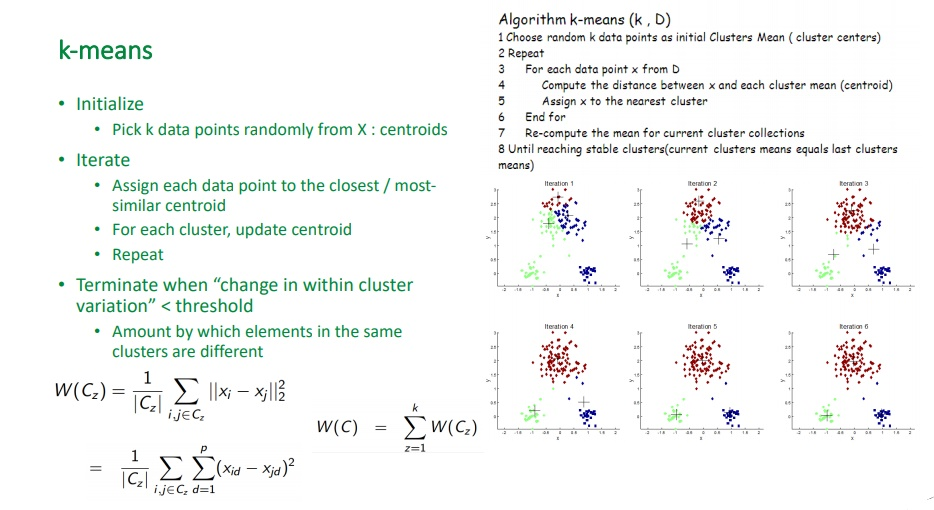

In [51]:
Image('kmeans.jpg')

> - z = cluster id
- $W(C_z)$ = Within sum of square of cluster z
- $||x_i - x_j||$ = distance between row i and row j
- 2 at Bottom represent L2 distance(Euclidean)


### Limitations of K-means <a class = 'anchor' id ='kmeans_limitations'></a>

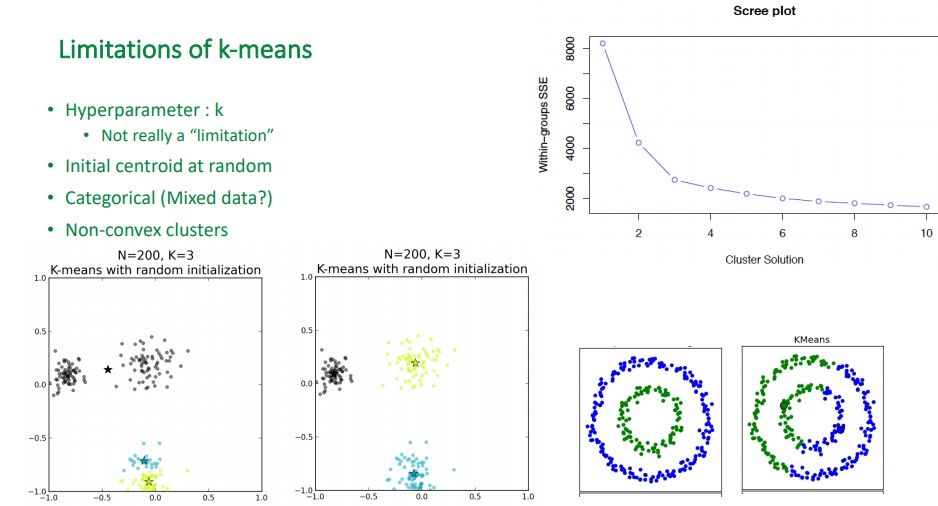

In [52]:
Image('kmeans_limitations.jpg')

### K-means++ <a class = 'anchor' id ='kmeans++'></a>

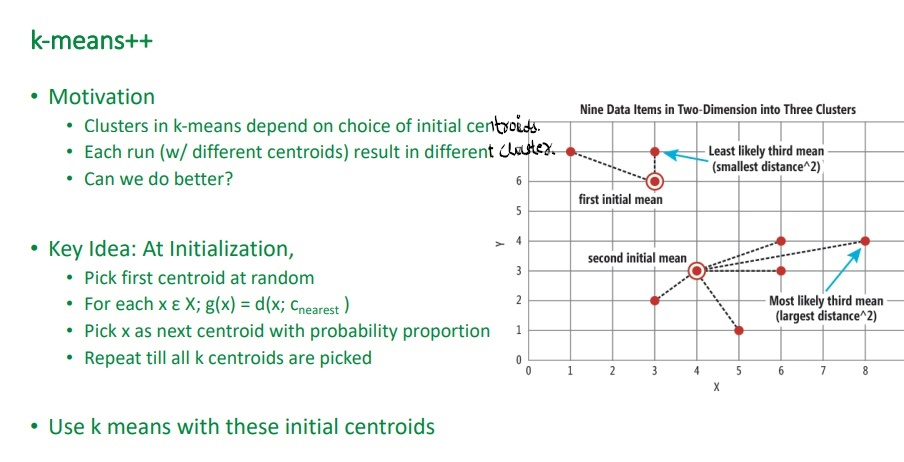

In [53]:
Image('kmeans++.jpg')

### K-medoids <a class = 'anchor' id ='kmedoids'></a>

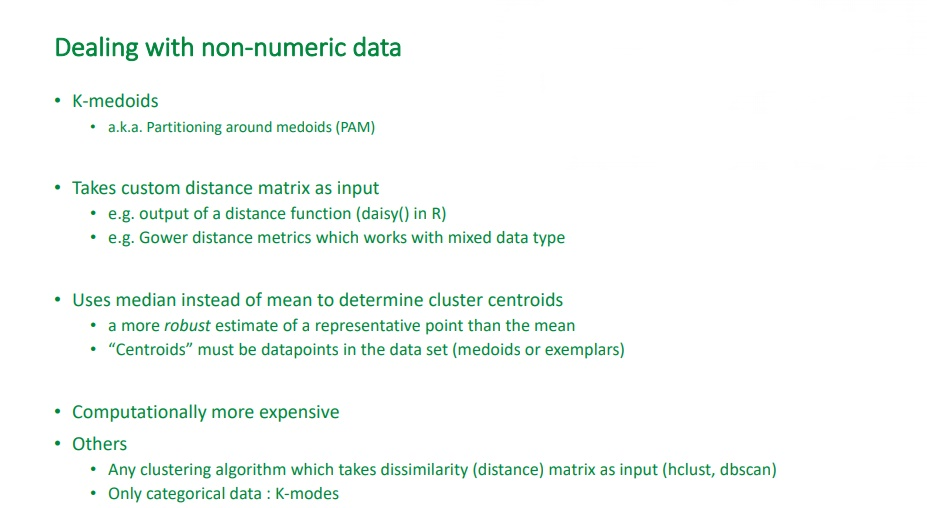

In [54]:
Image('kmedoids.jpg')

### Silhouette <a class = 'anchor' id ='silhouette'></a>

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

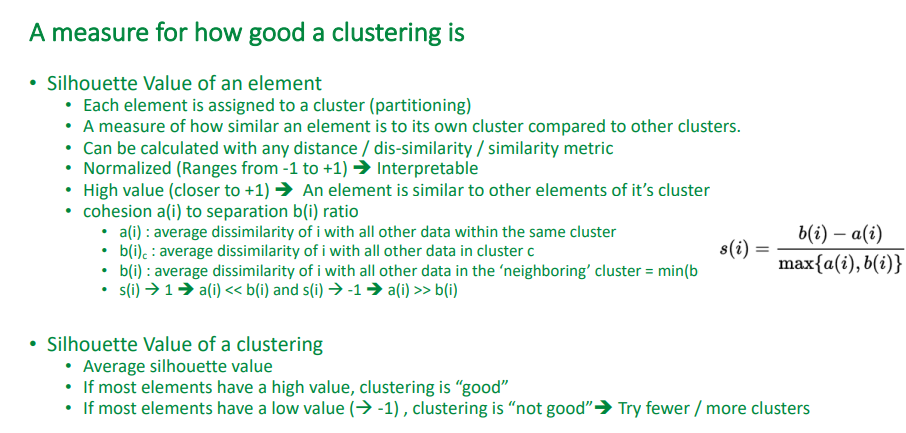

In [55]:
Image('silhouette.png')

### Elbow Method <a class = 'anchor' id ='elbow'></a>

Select the optimal number of clusters by fitting the model with a range of values for $K$

For more details on Elbow Method [Click Here](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

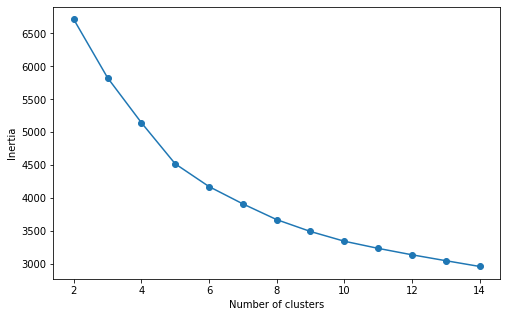

In [56]:
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(df_norm)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [57]:
for i in range(5,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.229 
Silhouette score for 6 clusters k-means : 0.245 
Silhouette score for 7 clusters k-means : 0.238 
Silhouette score for 8 clusters k-means : 0.239 
Silhouette score for 9 clusters k-means : 0.218 
Silhouette score for 10 clusters k-means : 0.217 


The values of silhouette score are close to each other in range 6 to 8. In the circumstances, Let's look at the another metric. The metric is Davies Bouldin that is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The minimum score is zero, with lower values indicating better clustering.

In [58]:
for i in [6,7,8]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,kmeans_labels).round(3)))

Davies Bouldin Score:1.404
Davies Bouldin Score:1.354
Davies Bouldin Score:1.412


Unlike Davies Bouldin, we want to be high of Silhouette score. Hence, when we evaluate both Elbow technique and Silhouette score, optimal cluster numbers are 7 according to K-Means Algorithm. So we have determined 7 as the k values of the K-means model.

In [59]:
kmeans_labels=KMeans(n_clusters=7,random_state=123).fit_predict(df_norm)

In [60]:
kmeans_labels # returns cluster id array 

array([3, 4, 0, ..., 2, 2, 2])

### Visualization of Clusters using PCA <a class = "anchor" id = "kmeans_visual" > </a>

Now, Let's visualize "CC GENERAL" dataset in three-dimensional space. Hence, we should apply PCA before.

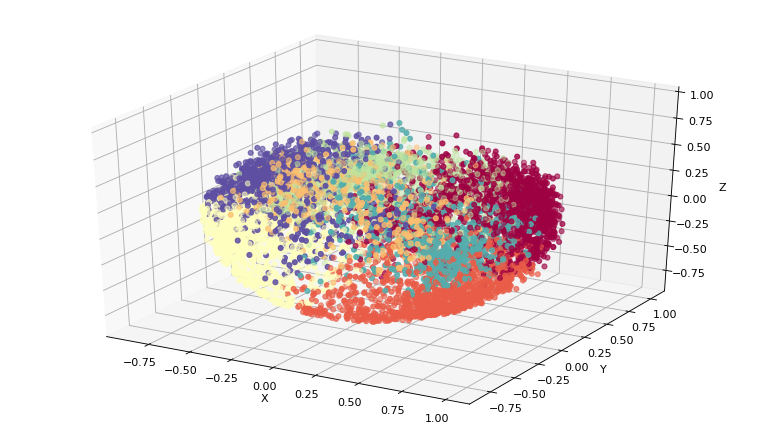

In [61]:
pca = PCA(n_components=3).fit_transform(df_norm)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

## MiniBatch K-Means <a class = "anchor" id = "minikmeans" > </a>

`MiniBatchKMeans` works similarly to `KMeans` , with one significance `difference`: the `batch_size` parameter. batch_size controls the number of randomly selected observations in each batch. The larger the the size of the batch, the more `computationally costly` the training process

In [62]:
for i in range(5,11):
    minikm_labels = MiniBatchKMeans(n_clusters=i, init = 'random', batch_size=100000).fit_predict(df_norm)
    print("Silhouette score for {} clusters miniBatch k-means : {}".format(i,metrics.silhouette_score(df_norm,minikm_labels,metric='euclidean').round(3)))

Silhouette score for 5 clusters miniBatch k-means : 0.175
Silhouette score for 6 clusters miniBatch k-means : 0.213
Silhouette score for 7 clusters miniBatch k-means : 0.208
Silhouette score for 8 clusters miniBatch k-means : 0.208
Silhouette score for 9 clusters miniBatch k-means : 0.21
Silhouette score for 10 clusters miniBatch k-means : 0.224


In [63]:
for i in [5,7,9]:
    minikm_labels = MiniBatchKMeans(n_clusters=i,init='random',batch_size=100000).fit_predict(df_norm)
    print('Davies Bouldin Score for {} clusters miniBatch k-means : {}'.format(i, metrics.davies_bouldin_score(df_norm,minikm_labels).round(3)))

Davies Bouldin Score for 5 clusters miniBatch k-means : 1.528
Davies Bouldin Score for 7 clusters miniBatch k-means : 1.511
Davies Bouldin Score for 9 clusters miniBatch k-means : 1.598


By seeing Silhouette score for 7 clusters miniBatch k-means : 0.239 and Davies Bouldin Score for 7 clusters miniBatch k-means : 1.363

In [64]:
minikm_labels = MiniBatchKMeans(n_clusters=7, init='random',batch_size=100000).fit_predict(df_norm)

### Visualization of Clusters using PCA <a class = "anchor" id = "minikmeans_visual" > </a>

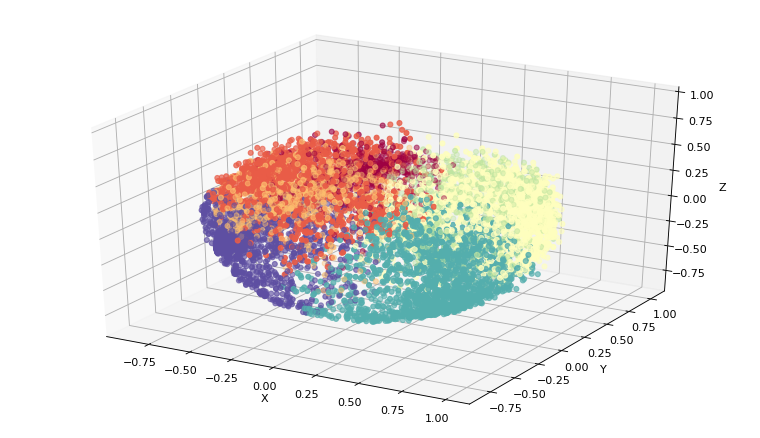

In [65]:
pca = PCA(n_components=3).fit_transform(df_norm)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=minikm_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

## Hierarchical Clustering <a class = "anchor" id = "hierarchical_clust" > </a>

Hierarchical clustering is a clustering technique that aims to create a tree like clustering hierarchy within the data. On this model, to determine the n_clusters, we can use a `dendrogram`.

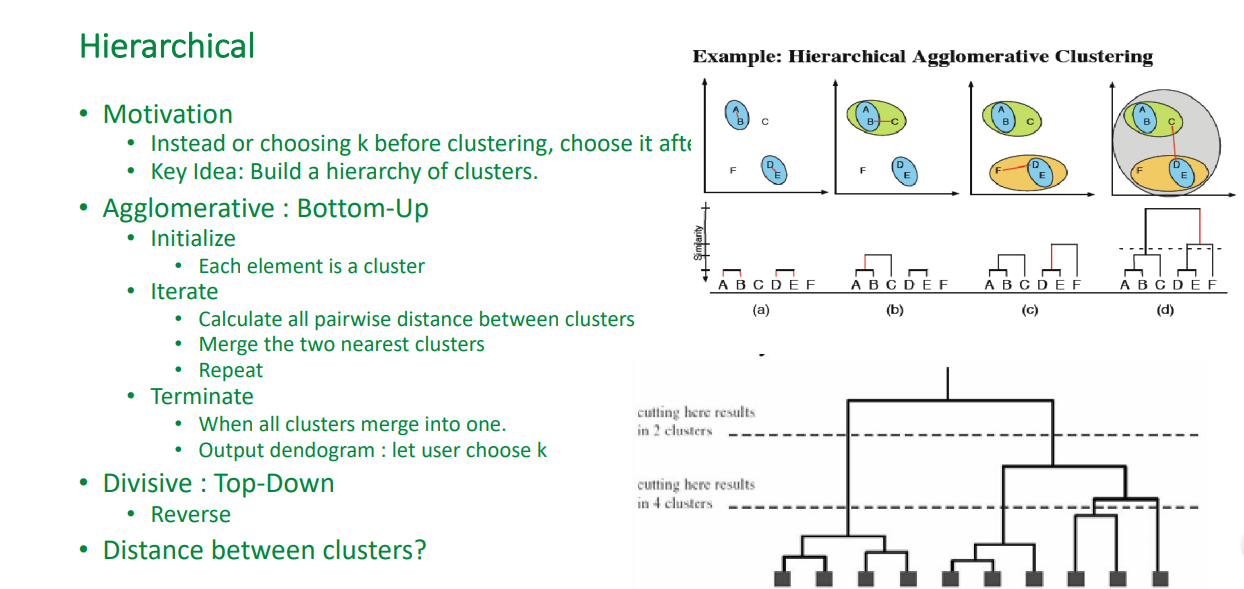

In [66]:
Image('hierarchical.png')

### Dendrogram <a class = "anchor" id = "dendrogram" > </a>

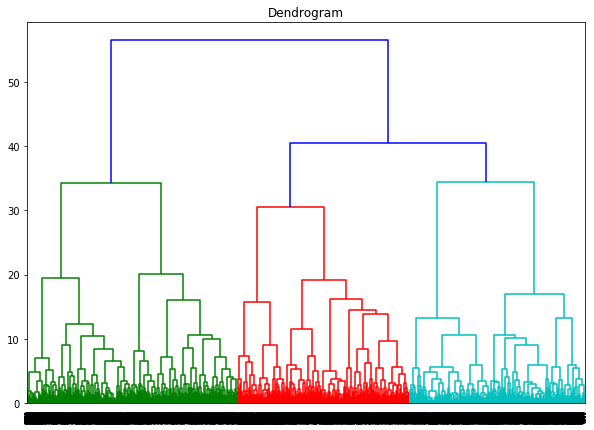

In [67]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(df_norm, method = 'ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 38 and cut the dendrogram.

There are three clusters according to the dendrogram.

In [68]:
hcluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hcp = hcluster.fit_predict(df_norm)
print("Silhouette score for Hierarchical Clustering:" + str(metrics.silhouette_score(df_norm,hcp, metric = 'euclidean')))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,hcp)))

Silhouette score for Hierarchical Clustering:0.16269232126810304
Davies Bouldin Score:2.0178566980982713


### Visualization of Clusters using PCA <a class = "anchor" id = "hierarchical_clust_visual" > </a>

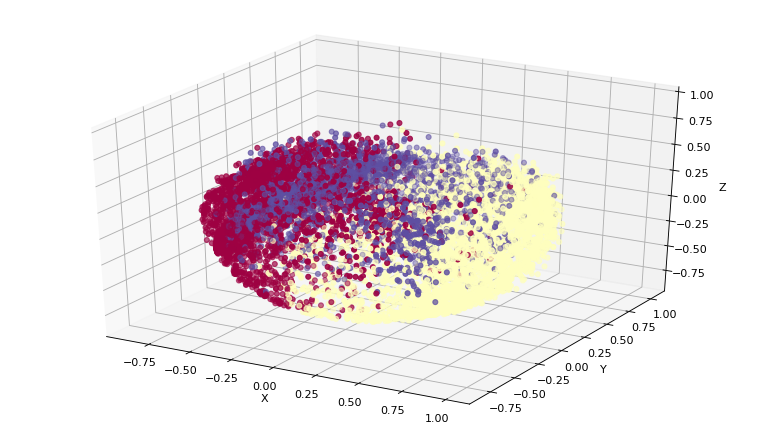

In [69]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=hcp,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

## DBScan Algorithm <a class = "anchor" id = "dbscan" > </a>

DBSCAN, as the name implies, is a `density-based` clustering algorithm. Density refers to the proximity of data points in a cluster and it is good for data which contains clusters of a similar density.

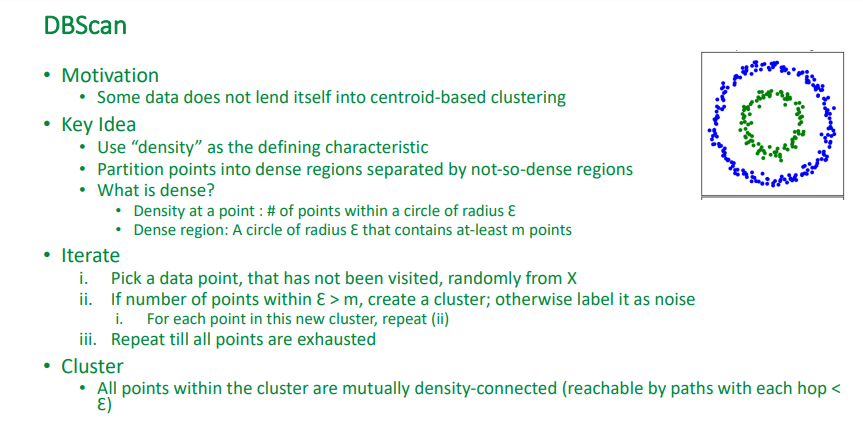

In [70]:
Image('dbscan.png')

Firstly, we should choose two parameters, a positive number epsilon and a natural number minPoints. Than we built the model.

In [71]:
results = pd.DataFrame(columns = ['Eps','Min_Samples', 'Number of Cluster', 'Silhouette Score'])
for i in range(1,12):
    for j in range(1,12):
        dbscan_cluster = DBSCAN(eps = i*0.2, min_samples = j)
        clusters = dbscan_cluster.fit_predict(df_norm)
        if len(np.unique(clusters))>2:
            results = results.append({'Eps':i*0.2,
                                     'Min_Samples':j,
                                     'Number of Cluster':len(np.unique(clusters)),
                                     'Silhouette Score':metrics.silhouette_score(df_norm,clusters),
                                     'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)}, ignore_index = True)

In [73]:
results.sort_values('Silhouette Score', ascending = False)[:5]

Eps  Min_Samples  Number of Cluster  Silhouette Score  \
16  0.4          6.0                3.0         -0.033530   
18  0.6          2.0                4.0         -0.046250   
14  0.4          4.0                5.0         -0.122670   
15  0.4          5.0                5.0         -0.124499   
10  0.2         11.0               18.0         -0.238821   

    Davies Bouldin Score  
16              4.460939  
18              3.857114  
14              3.361897  
15              3.304983  
10              1.344078

It seems that DBSCAN is not an appropriate method for this dataset. We have selected eps and min_samples that are 0.4 and 4 respectively.

In [74]:
dbscan_cluster = DBSCAN(eps = 0.4, min_samples = 4)
db_clusters = dbscan_cluster.fit_predict(df_norm)

### Visualization of Clusters using PCA <a class = "anchor" id = "dbscan_visual" > </a>

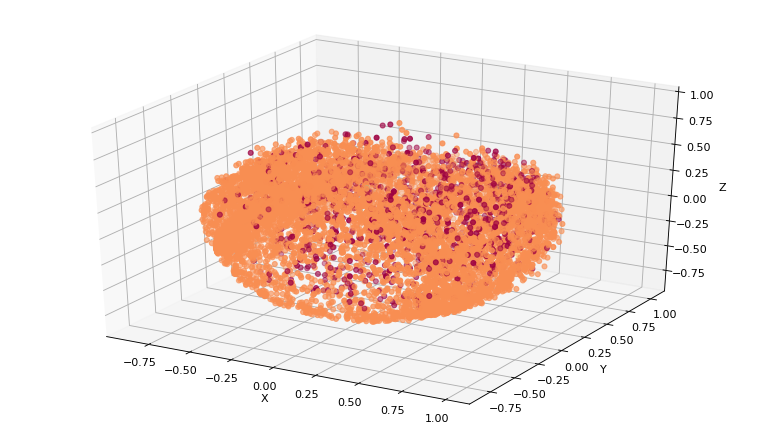

In [75]:
pca = PCA(n_components=3).fit_transform(df_norm)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=db_clusters,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

It seems like, there isn't distinguishable distributions in data for clustering.

## GMM Algorithm <a class = "anchor" id = "gmm" > </a>

Gaussian Mixture Models (GMMs) assume there are a number of Gaussian distributions, and each of them represents a cluster. Therefore a Gaussian Mixture Model tends to group together the data points that belong to a single distribution.

Firstly, we should determine the n_clusters. The optimal number of clusters (k) is the value that minimizes the Akaike information criterion (AIC) or the Bayesian information criterion (BIC).

For Detailed Explanation [Click Here](https://www.kaggle.com/vipulgandhi/gaussian-mixture-models-clustering-explained)

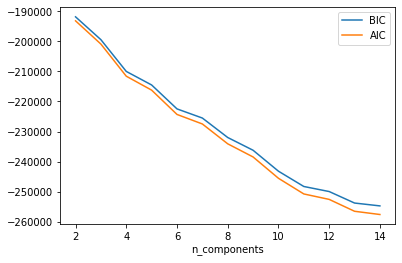

In [76]:
models = [GaussianMixture(n,covariance_type='tied', random_state=123).fit(df_norm) for n in range(2,15)]
plt.plot(range(2,15), [m.bic(df_norm) for m in models], label='BIC')
plt.plot(range(2,15), [m.aic(df_norm) for m in models], label='AIC')
plt.legend()
plt.xlabel('n_components')
plt.show()

In the present case, when the number of clusters increase, the values ​​of AIC and BIC scores decrease which doesn't give us a suitable solution.

Let's look at the performance metrics according to changing parameters. Also we are going to calculate the Davies Bouldin Score.

In [91]:
parameters=['full','tied','diag','spherical']
n_clusters=np.arange(1,21)
results_=pd.DataFrame(columns=['Covariance Type','Number of Cluster','Silhouette Score','Davies Bouldin Score'])
for i in parameters:
    for j in n_clusters:
        gmm_cluster=GaussianMixture(n_components=j,covariance_type=i,random_state=123)
        clusters=gmm_cluster.fit_predict(df_norm)
        if len(np.unique(clusters))>=2:
            results_=results_.append({"Covariance Type":i,'Number of Cluster':j,"Silhouette Score":metrics.silhouette_score(df_norm,clusters),
                                      'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)},ignore_index=True)


C:\Users\CG-DTE\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\CG-DTE\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\CG-DTE\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [92]:
display(results_.sort_values(by=["Silhouette Score"], ascending=False)[:5])

Covariance Type Number of Cluster  Silhouette Score  Davies Bouldin Score
57       spherical                 2          0.225937              1.788465
61       spherical                 6          0.223920              1.458188
19            tied                 2          0.221191              1.820584
63       spherical                 8          0.218563              1.421994
23            tied                 6          0.210932              1.535861

    We have selected covariance type and number of clusters that are ‘spherical’ and 5 respectively. The parameters have given the Silhouette Score of 0.207.

In [93]:
gmm_cluster=GaussianMixture(n_components=5,covariance_type="spherical",random_state=123)
gmm_cluster.fit(df_norm)
gmm_labels = gmm_cluster.predict(df_norm)

### Visualization of Clusters using PCA <a class = "anchor" id = "gmm_visual" > </a>

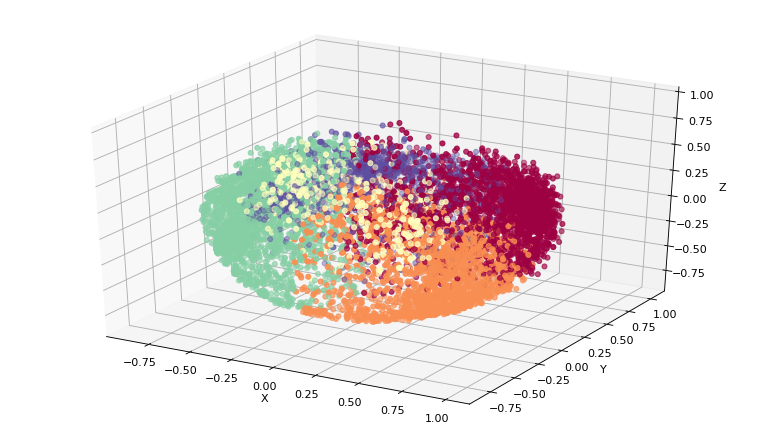

In [94]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=gmm_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

## Mean Shift <a class = "anchor" id = "mean_shift" > </a>

MeanShift algorithm is another powerful clustering algorithm used in unsupervised learning. Unlike K-means clustering, it doesn’t require any assumptions; hence it is a non-parametric algorithm.

MeanShift algorithm basically assigns the datapoints to the clusters iteratively by shifting points towards the highest density of datapoints i.e. cluster centroid.

In [95]:
est_bandwidth = estimate_bandwidth(df_norm,quantile=0.1,n_samples=10000)
mean_shift = MeanShift(bandwidth= est_bandwidth, bin_seeding=True).fit(df_norm)
labels_unique=np.unique(mean_shift.labels_)
n_clusters_=len(labels_unique)
print("Number of estimated clusters : %d" % n_clusters_)

Number of estimated clusters : 3


In [96]:
print('Silhouette Score for MeanShift:'+str(metrics.silhouette_score(df_norm,mean_shift.labels_,metric='euclidean').round(3)))
print('Davies Bouldin Score for MeanShift:'+str(metrics.davies_bouldin_score(df_norm,mean_shift.labels_).round(3)))

Silhouette Score for MeanShift:0.181
Davies Bouldin Score for MeanShift:2.114


### Visualization of Clusters using PCA <a class = "anchor" id = "mean_shift_visual" > </a>

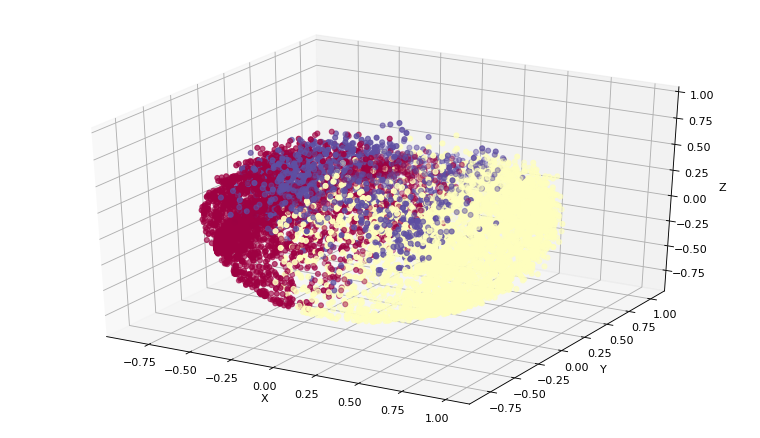

In [97]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=mean_shift.labels_, cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

## Comparison of Results <a class = "anchor" id = "comp_of_results" > </a>

In [98]:
algorithms=["K-Means","MiniBatch K-Means","Hierarchical Clustering","DBSCAN","Gaussian Mixture Model","MeanShift"]

# Silhouette Score
ss=[metrics.silhouette_score(df_norm,kmeans_labels),metrics.silhouette_score(df_norm,minikm_labels),metrics.silhouette_score(df_norm,hcp),
   metrics.silhouette_score(df_norm,db_clusters),metrics.silhouette_score(df_norm,gmm_labels),metrics.silhouette_score(df_norm,mean_shift.labels_)]

# Davies Bouldin Score
db=[metrics.davies_bouldin_score(df_norm,kmeans_labels),metrics.davies_bouldin_score(df_norm,minikm_labels),metrics.davies_bouldin_score(df_norm,hcp),
   metrics.davies_bouldin_score(df_norm,db_clusters),metrics.davies_bouldin_score(df_norm,gmm_labels),metrics.davies_bouldin_score(df_norm,mean_shift.labels_)]

In [99]:
comprsn={"Algorithms":algorithms,"Davies Bouldin":db,"Silhouette Score":ss}
compdf=pd.DataFrame(comprsn)
display(compdf.sort_values(by=["Silhouette Score"], ascending=False))

Algorithms  Davies Bouldin  Silhouette Score
0                  K-Means        1.354323          0.237578
4   Gaussian Mixture Model        1.572907          0.210728
1        MiniBatch K-Means        1.672205          0.208970
5                MeanShift        2.114327          0.180770
2  Hierarchical Clustering        2.017857          0.162692
3                   DBSCAN        3.361897         -0.122670

We have tried six algorithm. `K-Means` and `MINIBatch K-Means` has the best `Silhouette` and `Davies Bouldin` score. But to avoid computational cost we are choosing `K-Means` algorithm as best Clustering Algorithm for customer segmentation. Thus we have segmented the customer into 7 types. Let’s try to understand behaviours or labels of customers.

In [100]:
data['Clusters']=list(kmeans_labels)
customers=pd.DataFrame(data['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T

3     0     4     1     6    5    2
Number of Customers  1865  1653  1551  1305  1150  772  654

In [101]:
means=pd.DataFrame(data.describe().loc['mean'])
means.T.iloc[:,[0,1,6,8,9,11,12,16]].round(1)

BALANCE  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
mean   1564.5                0.9                  0.5   

      PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  \
mean                               0.4                     0.1           14.7   

      CREDIT_LIMIT  TENURE  
mean        4494.4    11.5

In [102]:
data.set_index('Clusters')
grouped=data.groupby(by='Clusters').mean().round(1)
grouped.iloc[:,[0,1,6,8,9,11,12,16]]

BALANCE  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
Clusters                                                    
0          2020.6                1.0                  0.9   
1           947.8                1.0                  0.9   
2           871.9                0.8                  0.4   
3          1259.5                1.0                  0.1   
4          4047.4                1.0                  0.2   
5            99.6                0.9                  0.8   
6           131.8                0.4                  0.2   

          PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
Clusters                                                             
0                                      0.6                     0.1   
1                                      0.8                     0.0   
2                                      0.3                     0.2   
3                                      0.0                     0.1   
4                                      0.2                     0.4   
5                                      0.7                     0.0   
6                                      0.2                     0.0   

          PURCHASES_TRX  CREDIT_LIMIT  TENURE  
Clusters                                       
0                  44.6        7003.0    11.9  
1                  18.5        2906.4    11.9  
2                   5.1        2511.5     7.4  
3                   2.2        2780.3    11.9  
4                   5.8        6750.6    11.7  
5                  16.6        4119.6    11.7  
6                   4.1        3807.1    11.8

## Interpretation of Clusters <a class = "anchor" id = "interpretation" > </a>

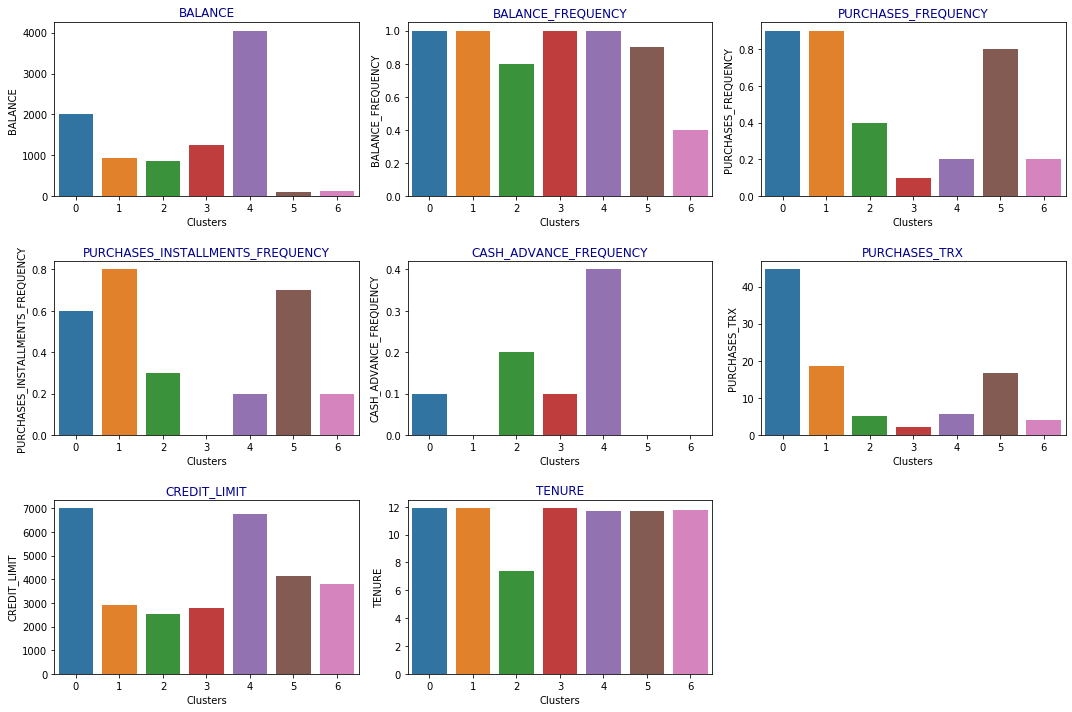

In [103]:
features=["BALANCE","BALANCE_FREQUENCY","PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","PURCHASES_TRX","CREDIT_LIMIT","TENURE"]
plt.figure(figsize=(15,10))
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

We have choosen some columns that are significant to identify the clusters.

Cluster 0 : The highest purchase frequency which tend to pay in installment, that is higher credit limit and long duration customers.

Cluster 1 : Pretty low balance.High Purchase frequency. No cash in advance being paid. Frequent user of credit card and they have lower credit limit.

Cluster 2 : Balance is updated frequently. This group is lowest usage of cards. Inactive customers.

Cluster 3 : Balance is updated frequently. They don't use card for purchase at all.

Cluster 4 : The highest balance amount but purchase frequency is not that good. Tend to cash in advance, higher credit limit than others. They don’t like spending money.

Cluster 5 : Second highest purchase frequency and also higher tendency payment in installment.No cash in advance being paid. They are long duration customers.

Cluster 6 : The least quantity of customer is in this group which are below avarage of purchase frequency.

## Summary <a class = "anchor" id = "summary" > </a>

We started with `Exploratory Data Analysis (EDA)` to understand the given dataset * Observation: Precense of unidimentional Outliers, 314 missing values*. Than We Perform `data Pre-processing` *like Removing columns which are not of use for bulding model, Imputing Null values with suitable central tendency(mean, median, mode) and scaling*. Than, we applied different `Clustering Algorithms`. After comparing these clustering models than, we decided to use K-Means as the model. Than, we divided the data into seven clusters, because seven clusters can be easily used to determine the behaviours of customers. However, each of the clusters have their own characteristics.